In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient

news_api = os.getenv("NEWS_API")



In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api)



### Run IEX 

In [5]:
# Fetch the Bitcoin news articles
# bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

bitcoin_articles['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Brian Barrett',
 'title': "The 'Robo Revenge' App Makes It Easy to Sue Robocallers",
 'description': "Mac malware, a Bitcoin mixer, and more of the week's top security news.",
 'url': 'https://www.wired.com/story/robo-revenge-apple-malware-security-news/',
 'urlToImage': 'https://media.wired.com/photos/5e471046e7120600088b2022/191:100/w_1280,c_limit/Security_robbocalls-84289419.jpg',
 'publishedAt': '2020-02-15T14:00:00Z',
 'content': "Just when you thought the catastrophic Equifax breach was entirely in the rearview, the Department of Justice this week charged four Chinese military hackers with the theft. That's 147.9 million people's Social Security numbers and other personal information … [+4002 chars]"}

In [8]:
# Fetch the Ethereum news articles
# ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

ethereum_articles['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Greg Kumparak',
 'title': 'Horizon raises another $5M to put virtual items on the blockchain and launch its first game',
 'description': 'If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game? In most cases, the answer is probably closer to the latter. The item may be in the player’s digital inventory – but the company can take i…',
 'url': 'http://techcrunch.com/2020/03/06/horizon-raises-another-5m-to-put-virtual-items-on-the-blockchain/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/03/skyweaver.png?w=756',
 'publishedAt': '2020-03-06T17:01:15Z',
 'content': 'If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars]'}

In [6]:
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        
        bitcoin_sentiments.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'text']
bitcoin_df = bitcoin_df[columns]

# Save information to pickle
bitcoin_df.to_pickle("bitcoin_pickle.pkl")

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2023,0.107,0.769,0.124,Just when you thought the catastrophic Equifax...
1,0.7906,0.000,0.863,0.137,"Hi again, its Steven Levy, WIREDs editor at la..."
2,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
3,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
4,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...


In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        
        bitcoin_sentiments.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'text']
bitcoin_df = bitcoin_df[columns]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin..."


In [9]:
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        
        ethereum_sentiments.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'text']
ethereum_df = ethereum_df[columns]

# Save ethereum sentiment to pickle file
ethereum_df.to_pickle("ethereum_pickle.pkl")

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...
1,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
2,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...
3,0.7184,0.000,0.870,0.130,Skale Network is taking steps to help its cryp...
4,0.4019,0.000,0.932,0.068,The South Korean National Assembly passed new ...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        
        ethereum_sentiments.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'text']
ethereum_df = ethereum_df[columns]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin..."


In [64]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,93.000000,93.000000,93.000000,93.000000
mean,0.153872,0.053839,0.859667,0.086559
std,0.535277,0.070720,0.102750,0.085690
min,-0.933700,0.000000,0.375000,0.000000
25%,-0.226300,0.000000,0.813000,0.043000
50%,0.318200,0.000000,0.872000,0.068000
75%,0.557400,0.093000,0.932000,0.122000
max,0.906000,0.295000,1.000000,0.625000


In [65]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.261807,0.023021,0.906177,0.070802
std,0.394711,0.040821,0.073067,0.064437
min,-0.802000,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.329100,0.000000,0.919000,0.063500
75%,0.599400,0.041250,0.952750,0.121250
max,0.905900,0.177000,1.000000,0.254000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin articles had in average more positive scores.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the single highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary

In [4]:
# Load the sentiment scores from pickle file
bitcoin_df = pd.read_pickle("bitcoin_pickle.pkl")
ethereum_df = pd.read_pickle("ethereum_pickle.pkl")

In [4]:
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2023,0.107,0.769,0.124,Just when you thought the catastrophic Equifax...
1,0.7906,0.000,0.863,0.137,"Hi again, its Steven Levy, WIREDs editor at la..."
2,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
3,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
4,0.1280,0.041,0.907,0.052,But its still unclear if you need to report th...


In [5]:
bitcoin_text = bitcoin_df['text'].values.tolist()
ethereum_text = ethereum_df['text'].values.tolist()

In [6]:
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
#     for article in text:
    word_tokenized = []
    
    for article in text: 
    # Create a list of the words
        sw = set(stopwords.words('english'))
        regex = re.compile("[^a-zA-Z ]")
        re_clean = regex.sub('', article)
        words = word_tokenize(re_clean)
        lem = [lemmatizer.lemmatize(word) for word in words]
        tokens = [word.lower() for word in lem if word.lower() not in sw]
        
        word_tokenized.append(tokens)
    

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    return word_tokenized


In [7]:
bitcoin_tokenized = tokenizer(bitcoin_text)

In [66]:
columns_bitcoin = bitcoin_tokenized

In [68]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = columns_bitcoin
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.2023,0.107,0.769,0.124,Just when you thought the catastrophic Equifax...,"[thought, catastrophic, equifax, breach, wa, e..."
1,0.7906,0.000,0.863,0.137,"Hi again, its Steven Levy, WIREDs editor at la...","[hi, steven, levy, wireds, editor, large, edit..."
2,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...,"[launching, two, cryptocurrencyoriented, smart..."
3,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...,"[youve, following, cryptocurrency, news, past,..."
4,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...,"[indias, supreme, court, wednesday, overturned..."


In [69]:
ethereum_tokenized = tokenizer(ethereum_text)
columns_ethereum = ethereum_tokenized

In [71]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = columns_ethereum
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
1,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...,"[youve, following, cryptocurrency, news, past,..."
2,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...,"[come, celebrity, shilling, shady, initial, co..."
3,0.7184,0.000,0.870,0.130,Skale Network is taking steps to help its cryp...,"[skale, network, taking, step, help, cryptocur..."
4,0.4019,0.000,0.932,0.068,The South Korean National Assembly passed new ...,"[south, korean, national, assembly, passed, ne..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [10]:
from collections import Counter
from nltk import ngrams

In [11]:
def process_text(text):
    """Tokenizes text."""
    
#     for article in text:
    word_tokenized = []
    
#     for article in text: 
    # Create a list of the words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    return tokens

In [12]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(corpus):
    
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    
#     for sublist in processed:
#         word_list.append(sublist)

    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return top_10

In [71]:
bigram_counter(bitcoin_text)

{('satoshi', 'nakaboto'): 28,
 ('bitcoin', 'btc'): 16,
 ('btc', 'every'): 15,
 ('char', 'robot'): 14,
 ('robot', 'colleague'): 14,
 ('colleague', 'satoshi'): 14,
 ('nakaboto', 'writes'): 14,
 ('writes', 'bitcoin'): 14,
 ('every', 'fucking'): 14,
 ('fucking', 'daywelcome'): 14}

In [73]:
# Generate the Ethereum N-grams where N=2
bigram_counter(ethereum_text)

{('early', 'morning'): 11,
 ('char', 'eoseos'): 11,
 ('eos', 'ended'): 11,
 ('start', 'day'): 10,
 ('ended', 'day'): 9,
 ('day', 'saw'): 9,
 ('saw', 'eos'): 9,
 ('morning', 'intraday'): 9,
 ('decentralized', 'finance'): 8,
 ('char', 'ethereum'): 7}

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    return Counter(processed).most_common(N)

In [72]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_text)

[('char', 91),
 ('bitcoin', 79),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('ha', 24),
 ('today', 20),
 ('btc', 18),
 ('say', 17),
 ('edition', 16),
 ('past', 16)]

In [22]:
# Get the top 10 words for Ethereum

[('char', 19),
 ('Ethereum', 9),
 ('blockchain', 8),
 ('key', 7),
 ('private', 5),
 ('world', 5),
 ('time', 4),
 ('weak', 4),
 ('million', 4),
 ('transaction', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
def process_words(text):
    """Tokenizes text."""
    
#     for article in text:
    word_tokenized = []
    
#     for article in text: 
    # Create a list of the words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    return ' '.join(tokens)

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
big_string_bitcoin = ' '.join(bitcoin_text)
bitcoin_input_words = process_words(big_string)

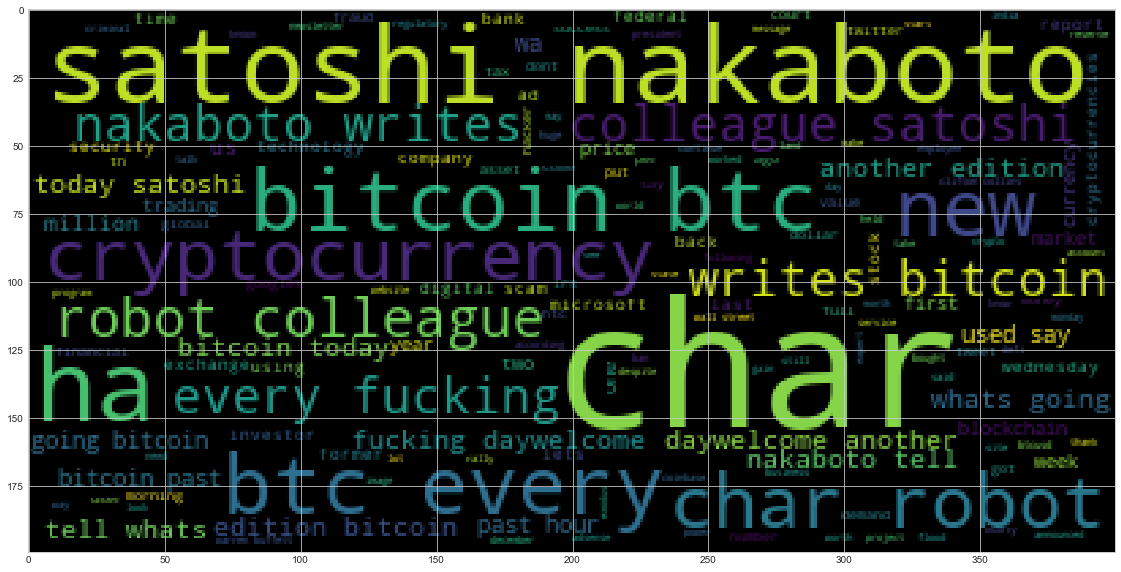

In [73]:
# Generate the Bitcoin word cloud
wc_bitcoin = WordCloud().generate(bitcoin_input_words)
plt.imshow(wc_bitcoin)

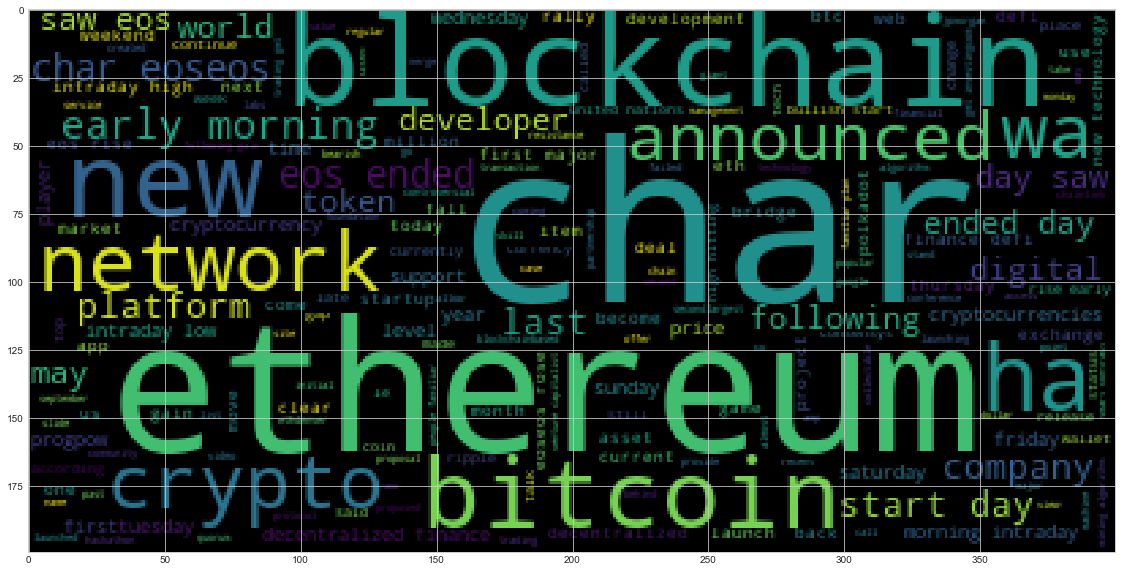

In [37]:
# Generate the Ethereum word cloud
big_string_ethereum = ' '.join(ethereum_text)
ethereum_input_words = process_words(big_string_ethereum)
wc_ethereum = WordCloud().generate(ethereum_input_words)
plt.imshow(wc_ethereum)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [43]:
flatten = lambda bitcoin_text: [item for sublist in bitcoin_text for item in sublist]

In [74]:
# Concatenate all of the bitcoin text together
big_string_bitcoin

'Just when you thought the catastrophic Equifax breach was entirely in the rearview, the Department of Justice this week charged four Chinese military hackers with the theft. That\'s 147.9 million people\'s Social Security numbers and other personal information … [+4002 chars] Hi again, its Steven Levy, WIREDs editor at large, with edition two of the Plaintext newsletter. Thanks for all your great comments about last weeks debut.\r\nI got a lot of questions about how this winds up in your mailbox. Short answer: Subscribe to WIRED. If… [+2181 chars] After launching two cryptocurrency-oriented smartphones, the HTC Exodus 1 and the Exodus 1s, the company is expanding the lineup with an entirely new device: a 5G router that can function as a full Bitcoin node.\xa0\r\nCalled the HTC Exodus 5G hub, the Android-bas… [+2230 chars] If youve been following cryptocurrency news for the past few months, theres one word that keeps coming back DeFi, also known as decentralized finance. As the name su

In [52]:
# Run the NER processor on all of the text
doc_bitcoin = nlp(big_string_bitcoin)

# Add a title to the document

In [53]:
# Render the visualization
displacy.render(doc_bitcoin, style='ent')

In [61]:
# List all Entities
for ent in doc_bitcoin.ents:
    print(ent.text, ent.label_)

Equifax ORG
the Department of Justice ORG
this week DATE
four CARDINAL
Chinese NORP
147.9 million CARDINAL
Social Security ORG
+4002 ORG
Steven Levy PERSON
two CARDINAL
Plaintext ORG
about last weeks DATE
+2181 WORK_OF_ART
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
Indias Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Wednesday DATE
IRS ORG
Dutch NORP
two CARDINAL
Netherlands GPE
Four CARDINAL
Bitcoin Halving ORG
May 20th 2020 DATE
third ORDINAL
50 percent PERCENT
BTC ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Stephen Hawking PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Sato

---

## Ethereum NER

In [62]:
# Concatenate all of the bitcoin text together
big_string_ethereum

'If a player picks up an item in an online video game, who owns that item? The player, or the company that made the game?\r\nIn most cases, the answer is probably closer to the latter. The item may be in the players digital inventory – but the company can take i… [+2713 chars] If youve been following cryptocurrency news for the past few months, theres one word that keeps coming back DeFi, also known as decentralized finance. As the name suggests, DeFi aims to bridge the gap between decentralized blockchains and financial services.\r… [+983 chars] When it comes to celebrities shilling shady initial coin offerings for money, the Securities and Exchange Commission is out for justice.\xa0\r\nActor Steven Seagal found himself on deadly ground on Thursday following an SEC charge that, back in 2018, he failed to … [+2035 chars] Skale Network is taking steps to help its cryptocurrency tokens stand up to regulatory scrutiny in an effort to encourage wide adoption for its blockchain-based techno

In [55]:
# Run the NER processor on all of the text
doc_ethereum = nlp(big_string_ethereum)

# Add a title to the document

In [56]:
# Render the visualization
displacy.render(doc_ethereum, style='ent')

In [63]:
# List all Entities
for ent in doc_ethereum.ents:
    print(ent.text, ent.label_)

the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
Skale Network ORG
blockchain GPE
Skale Network ORG
the N.O.D.E. Foundation ORG
first ORDINAL
The South Korean National Assembly ORG
today DATE
crypto GPE
blockchain GPE
+3338 GPE
this past week DATE
2020 CARDINAL
DApps &amp ORG
DLT ORG
Last June DATE
Washington GPE
DC GPE
Brendan Blumer PERSON
Block.one ORG
Steve Jobs PERSON
Voice ORG
A year earlier DATE
Blumers company ORG
+3666 WORK_OF_ART
some US Dollars MONEY
today DATE
many days DATE
today DATE
Bitcoin GPE
Ethereum GPE
US GPE
Centre GPE
Circle GPE
Intel ORG
Today DATE
IPFS ORG
Terminal ORG
one CARDINAL
February DATE
26 CARDINAL
2020 CARDINAL
7 min QUANTITY
IRS ORG
Last month DATE
LinkedIn ORG
the new year DATE
ten CARDINAL
2019 DATE
blockchain GPE
Blockchain GPE
the United States GPE
United ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON